In [3]:
# upload file yang sudah diunduh
# file akan disimpan sesuai dengan nama file yang diunggah
from google.colab import files
file = files.upload()

Saving Foto Fahmi.jpeg to Foto Fahmi.jpeg


In [4]:
!ls

'Foto Fahmi.jpeg'   sample_data


In [5]:
# import library
import numpy as np
import matplotlib.pyplot as plt

import cv2
from google.colab.patches import cv2_imshow

In [6]:
img = cv2.imread("Foto Fahmi.jpeg")
print(img.shape)

(1280, 750, 3)


(384, 225, 3)


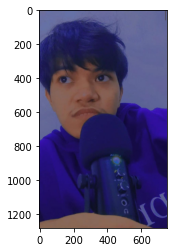

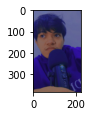

In [7]:
# Resize / Mengubah Ukuran

img = cv2.imread("Foto Fahmi.jpeg")[:, :, ::-1]
width, height = int(img.shape[1]*0.3), int(img.shape[0]*0.3)
img_resize = cv2.resize(img, 
                          (width, height), 
                          interpolation = cv2.INTER_AREA,)

plt.imshow(img)

plt.figure(figsize = (1.5, 1.5))
plt.imshow(img_resize)
print(img_resize.shape)

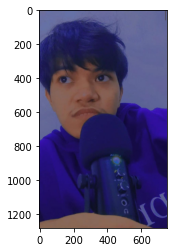

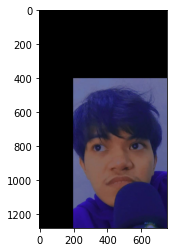

In [ ]:
img_translation = cv2.warpAffine(img, 
               np.array([[1, 0, 200], 
                        [0, 1, 400]], 
                dtype = np.float64),
               dsize = (img.shape[1], img.shape[0])) # right down shift

plt.imshow(img)
plt.figure()
plt.imshow(img_translation)

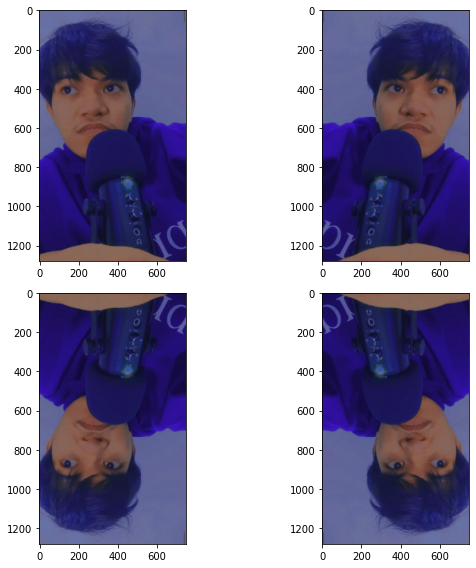

In [ ]:
# Flipping / Membalik

fig, axes = plt.subplots(2, 2, figsize = (8, 8))
fig.tight_layout()
axes = axes.ravel()
axes[0].imshow(img)
axes[1].imshow(img[:, ::-1, :])
axes[2].imshow(img[::-1, :, :])
axes[3].imshow(img[::-1, ::-1, :])

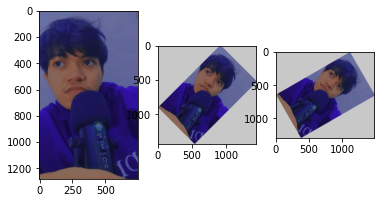

In [ ]:
# Rotasi / Memutar

def rotate(image, angle, border_color=None):
    # grab the dimensions of the image and then determine the
    # center
    if border_color == None:
        border_color=(255, 255, 255)

    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)
 
    # grab the rotation matrix (applying the negative of the
    # angle to rotate clockwise), then grab the sine and cosine
    # (i.e., the rotation components of the matrix)
    M = cv2.getRotationMatrix2D((cX, cY), -angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
 
    # compute the new bounding dimensions of the image
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))
 
    # adjust the rotation matrix to take into account translation
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY
 
    # perform the actual rotation and return the image
    return cv2.warpAffine(image, M, (nW, nH), borderValue=border_color)

rotated_image1 = rotate(img, angle=45, border_color = (200, 200, 200))
rotated_image2 = rotate(img, angle=60, border_color = (200, 200, 200))

fig = plt.figure()
plt.subplot(131)
plt.imshow(img)
plt.subplot(132)
plt.imshow(rotated_image1)
plt.subplot(133)
plt.imshow(rotated_image2)

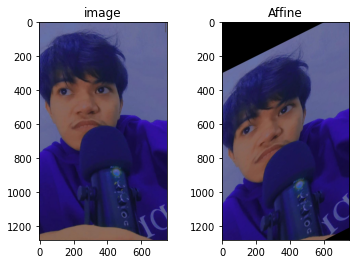

In [ ]:
# Affine Transformation / Merubah Afinitas

rows, cols, ch = img.shape
cv2.circle(img, (200,100), 20, (255,0,0),-1)
cv2.circle(img, (400,100), 20, (0,255,0),-1)
cv2.circle(img, (200,200), 20, (0,0,255),-1)

pts1 = np.float32([[200,100],[400,100],[200,200]])
pts2 = np.float32([[200,300],[400,200],[200,400]])

M = cv2.getAffineTransform(pts1, pts2)

dst = cv2.warpAffine(img, M, (cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('image')
plt.subplot(122),plt.imshow(dst),plt.title('Affine')
plt.show()

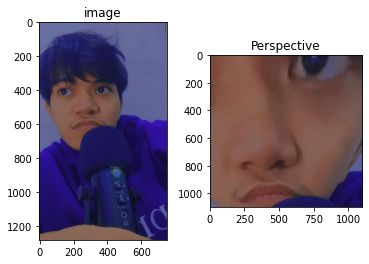

In [ ]:
# Perspective Transformation / Mengubah Perspektif
cv2.circle(img, (220,400), 10, (255,0,0),-1)
cv2.circle(img, (410,400), 10, (0,255,0),-1)
cv2.circle(img, (120,600), 10, (0,0,255),-1)
cv2.circle(img, (500,600), 10, (0,0,0),-1)

pts1 = np.float32([[220,400],[120,600],[410,400],[500,600]])
pts2 = np.float32([[10,10],[10,1000],[1000,10],[1000,1000]])

M = cv2.getPerspectiveTransform(pts1, pts2)

dst = cv2.warpPerspective(img, M, (1100,1100))

plt.subplot(121),plt.imshow(img),plt.title('image')
plt.subplot(122),plt.imshow(dst),plt.title('Perspective')
plt.show()

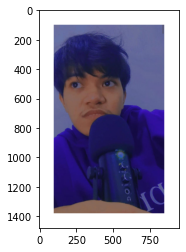

Berbagai Gambar 


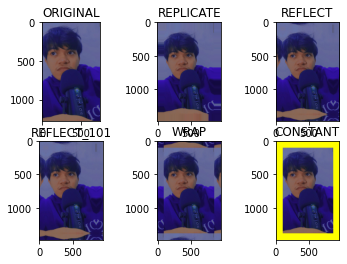

In [ ]:
# Padding / Menambahkan Lapisan Gambar (Border) atau Memberi (Frame) Bingkai .

bordersize = 100
color = [255, 255, 255]
bordered_img=cv2.copyMakeBorder(img, 
                                top=bordersize,bottom=bordersize, 
                                left=bordersize, right=bordersize, 
                                borderType= cv2.BORDER_CONSTANT, 
                                value=color )

#cv2.circle(bordered_img, (300, 320), radius = 10, color = [255, 0 ,0])
plt.imshow(bordered_img)
plt.show()
Warna_Kuning = (255,255,0)
img1 = img ## tidak perlu secara eksplisit menyalin image
replicate = cv2.copyMakeBorder(img1,100,100,100,100,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,100,100,100,100,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,100,100,100,100,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,100,100,100,100,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,100,100,100,100,cv2.BORDER_CONSTANT,value=Warna_Kuning)
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL'), 
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
print("Berbagai Gambar ")